<a href="https://colab.research.google.com/github/cpalme28/MAT-421/blob/main/Module_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 5 - Coree Palmer

**1.1 - Introduction**

Linear algebra is used in various disciplines such as data science and machine learning. It includes topics such as vector spaces, orthogonality, eigenvalues, matrix decomposition, etc.

The use of Python can help in such computations since they can be tedious to do by hand

In [1]:
import numpy as np

row_vector = np.array([[1, 2, 3]])
col_vector = np.array([[1], [2], [3]])

print(row_vector)
print("Dimensions of row_vector: ", row_vector.shape)
print()
print(col_vector)
print("Dimensions of col_vector: ", col_vector.shape)

# calculating cross product of two arrays
v = np.array([[1, 2, 3]])
w = np.array([10, 9, 8])

print("Cross product of v and w: ", np.cross(v, w))

[[1 2 3]]
Dimensions of row_vector:  (1, 3)

[[1]
 [2]
 [3]]
Dimensions of col_vector:  (3, 1)
Cross product of v and w:  [[-11  22 -11]]


Python can also be useful in calculations involving matrices.

In [6]:
p = np.array([[1, 2, 3], [4, 5, 6]]) # 2 x 3 array
q = np.array([[1, 2], [3, 4], [5, 6]]) # 3 x 2 array

print(np.dot(p, q)) # result should be a 2 x 2 matrix

[[22 28]
 [49 64]]


**1.2 - Elements of Linear Algebra**

Let $V = R^n$.

*Linear Spaces*

Linear Combinations
  * A linear combination is a new vector constructed from a subset by multiplying each vector by a constant and adding the results. A linear subspace is a result of linear combination.
  * A linear subspace of V is a subset U ⊆ V that is closed under vector addition and scalar multiplication
  * For all $u_1$, $u_2$ in U and alpha in R, it holds that $u_1 + u_2$ in U and alpha*$u_1$ in U.

In [7]:
# example of linear combination in python
a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
c = 5*a - 2*b
print(c)

[[-3  0  3]]


* Span
  * It is a set of all linear combinations.
  * A span is also a linear subspace.
  * Let W = span($w_1$,...,$w_m$).
* Column Space
  * The column space of A, denoted col(A), is the span of the columns of A, that is, col(A) = span($a_1$,...,$a_m$) in $R^n$.

Linear Independence and Dimension
* A list of vectors $u_1$,...,$u_m$ is linearly independent if none of them can be written as a linear combination of the others, that is, for all i, $u_i$ is not an element in span({$u_j$ : j != i}). A list of vectors is called linearly dependent if they are not linearly independent.

In [24]:
# proving linear independence

A = np.array([[9, -8, 7], [6, 5, 4], [8, 8, 9]])
print(np.linalg.det(A)) # a nonzero determinant means that the vectors are linearly independent

B = np.array([[0, 0, 0], [1, 2, 3], [1, 2, 3]])
print(np.linalg.det(B)) # a zero determinant means that the vectors are linearly dependent

349.0000000000002
0.0


Basis of a space
* Let U be a linear subspace of V. A basis of U is a list of vectors $u_1$,...,$u_m$ in U that: (1) span U, that is, U = span($u_1$,...,$u_m$); and (2) are linearly independent.
* A vector space can have several bases; however all the bases have the same number of elements, called the dimension of the vector space.
* The dimension of the column space of A is called the (column) rank of A.
* Dimension Theorem: Let U be a linear subspace of V. Any basis of U always has the same number of elements, All bases of U have the same length, that is, the same number of elements. We call this number the dimension of U and denote it dim(U).

*Orthogonality*

Orthonormal Bases
* A list of vectors is orthonormal if the $u_i$'s are pairwise orthogonal and each has norm 1, that is for all the i and all j != i, <$u_i$, $u_j$> = 0, and ||$u_i$|| = 1.

In [31]:
# orthogonality can be determined in Python
# if the angle between two vectors is 90 degrees (pi/2), then the vectors are orthogonal

from numpy import arccos, dot
from numpy.linalg import norm

a = np.array([[10, 9, 8]])
b = np.array([[1, 2, 3]])

theta1 = arccos(dot(a, b.T)/(norm(a)*norm(b)))
print("theta1: ", theta1) # since the output is 0.478 != pi/2, the vectors are not orthogonal

c = np.array([[5, 0, 0]])
d = np.array([[0, 5, 0]])

theta2 = arccos(dot(c, d.T)/(norm(c)*norm(d)))
print("theta2: ", theta2) # since the output is 1.57 = pi/2, the vectors are orthogonal

theta1:  [[0.47807086]]
theta2:  [[1.57079633]]


Best Approximation Theorem
* Let U ⊆ V be a linear subspace with orthonormal basis and v in V. For any u in U: ||v - $P_U$|| <= ||v - u||.
* Pythagoream Theorem
  * Let u, v in V be orthogonal. Then ||u + v||^2 = ||u||^2 + ||v||^2.
* Orthogonal Projection
  * Let U ⊆ V be a linear subspace with orthonormal basis $q_1$,...,$q_m$. The orthogonal projection of v in V on U is defined as $P_U$v = sum from j = 1 to m <v, $q_j$>$q_j$.
* Best Approximation Theorem: Let U ⊆ V be a linear subspace with orthonormal basis $q_1$,...,$q_m$. For any u in U, ||v - $P_U$v|| <= ||v - u||.

*Gram-Schmidt Process*

This algorithm is used to obtain an orthonormal basis. Let $a_1$,...,$a_m$ be linearly independent. The process takes advantage of the properties of the orthogonal projection derived above.
* Gram-Schmidt: Let $a_1$,...,$a_m$ in $R^n$ be linearly independent. Then there exist an orthonormal basis $q_1$,...,$q_m$ of span($a_1$,...,$a_m$).

*Eigenvalues and Eigenvectors*

Let A be in $R^{dxd}$ be a square matrix. Then λ in R is an eigenvalue of A if there exists a nonzero vector x != 0 such that Ax = λx. The vector x is referred to as an eigenvector.
* Any λ that satisfies the above equation is known as an eigenvalue of the matrix A.
* An eigenvalue expresses the degree of change undegone by a vector transformation

In [38]:
# finding eigenvalues and eigenvectors in Python

from numpy.linalg import eig

a = np.array([[2, 2, 2], [3, 4, 5], [3, 3, 3]])
w, v = eig(a)
print("E-value: ", w)
print("E-vector: ", v)

E-value:  [ 9.10977223e+00  3.77926307e-16 -1.09772229e-01]
E-vector:  [[ 0.36581826  0.40824829  0.31980655]
 [ 0.75171487 -0.81649658 -0.81706931]
 [ 0.54872739  0.40824829  0.47970982]]


Let A be in $R^{dxd}$ and let $λ_1$,...,$λ_m$ be distinct eigenvalues of A with corresponding nonzero eigenvectors $x_1$,...,$x_m$. Then $x_1$,...,$x_m$ are linearly independent. As a result, m <= d.

* Diagonalization of Symmetric Matrices
  * Let A be similar to a matrix D = diag($λ_1$,...,$λ_d$) with distinct diagonal entries, that is, there exists a nonsingular matrix P such that A = PDP^-1. Let $p_1$,...,$p_d$ be the columns of P. Then, AP = PD, which implies that A$p_i$ = $λ_i p_i$.
  * If A is symmetric, then any two eigenvectors from different eigenspaces are orthogonal.
  * The Spectral Theorem for Symmetric Matrices: An nxn symmetric matrix A has the following properties:
    * A has n real eigenvalues, counting multiplicities.
    * If λ is an eigenvalue of A with multiplicity k, then the eigenspace for λ is k-dimensional.
    * The eigenspaces are mutually orthogonal, in the sense that eigenvectors corresponding to different eigenvalues are orthogonal.
    * A is orthogonally disagonalizable.
* Constrained Optimization
  * Let A be nxn symmetric matrix A with an orthogonal diagonalization A = PDP^-1, The columns of P are orthonormal eigenvectors $v_1$,...,$v_n$ of A. Assume that the diagonal of D are arranged so that $λ_1 <= λ_2,...<= λ_n$.Then $min_{x != 0}$ (x^T Ax)/(x^T x) = $λ_1$ is achieved when x = $v_1$ and $max_{x != 0}$ (x^T Ax)/(x^T x) = $λ_n$ is achieved when x = $v_n$.

**1.3 - Linear Regression**

*QR Decomposition*

QR decomposition is a useful procedure to solve the linear least squares problem. First, we use the Gram-Schmidt algorithm to obtain an orthonormal basis span($a_1$,...,$a_m$) from a linearly independent set of span($a_1$,...,$a_m$).
* It is an interative method to find all the eigenvalues of a matrix

In [39]:
# QR Decomposition can also be accomplished in Python

from numpy.linalg import qr

a = np.array([[0, 2, -1],
              [2, 3, 6],
              [7, 9, 1]])
p = [1, 5, 10, 20]

# eigenvalues will converge eventually
for i in range(20):
  q, r = qr(a)
  a = np.dot(r, q)

  # only print certain iterations (as listed in p)
  if i+1 in p:
    print(f'Iteration {i+1}:')
    print(a)

Iteration 1:
[[ 5.11320755 -8.82470554  6.75434602]
 [-0.68536473  0.3890549  -1.8882416 ]
 [ 5.3683653   0.30952742 -1.50226244]]
Iteration 5:
[[ 9.77534558 -0.23453205 -6.90938226]
 [-0.34150197 -3.54250879 -4.89728462]
 [ 0.00980714  0.11404011 -2.23283679]]
Iteration 10:
[[ 9.77737748e+00  7.78116198e-01  6.74316833e+00]
 [ 1.30478547e-03 -3.05030254e+00  5.15603818e+00]
 [ 1.23876211e-05 -3.30283971e-02 -2.72707494e+00]]
Iteration 20:
[[ 9.77746172e+00  1.60712839e+00  6.59529066e+00]
 [ 3.98729592e-09 -2.41506935e+00  5.11635534e+00]
 [ 1.00990504e-10 -7.20239286e-02 -3.36239237e+00]]


*Least-squares Problems*

* This is another tactic used to solve this kind of problem.
* We try to solve the system Ax = b, which is often inconsistent. We are thus looking to use Ax to approximate b.
* If n = m, that is, if A is a square matrix, we can use the matrix inverse to solve the system. We, however, are more interested in the case where n > m.
* One possibility to make sense of the problem in that case is to cast it as the least-squares problem
  * $min_{x ∊ R^m} ||Ax - b||$
* The goal is to find the parameters of the estimation function that minimized the total squared error

Let b-hat = $P_{col(A)}b$. Because b-hat is in the column space of A, the equation Ax = b-hat is consistent and there is an x-hat such that A*x-hat = b-hat.

Linear Regression
* The common approach involves finding coefficients $beta_j$'s that minimize the criterion sum from i = 1 to n $(y_i$ - y-ha$t_i)^2$ where y-ha$t_i = beta_0 +$ sum from j = 1 to d of $beta_j x_{i,j}$ can be viewed as the predicted values of the linear model with coefficients $beta_j$.


[[0.55862278]
 [1.00161822]]


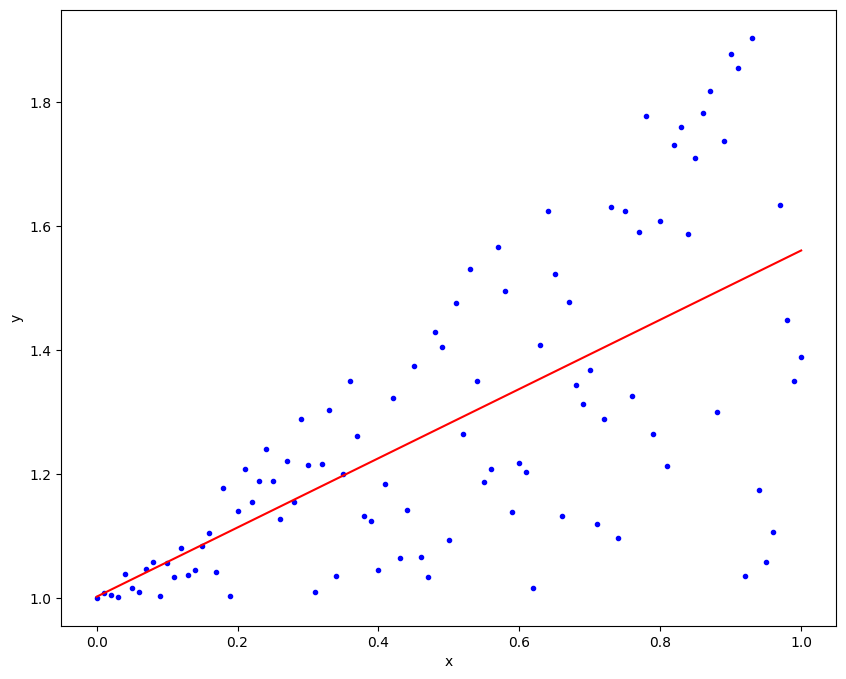

In [46]:
# Python can be used to compute least-squares regression

from scipy import optimize
import matplotlib.pyplot as plt

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x*np.random.random(len(x))

# assemble A
A = np.vstack([x, np.ones(len(x))]).T

# make y into a col vector
y = y[:, np.newaxis]

# using pseudoinverse
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

# plot
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()